In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [39]:
# read csv file
data = pd.read_csv('spotify_data.csv', dtype = {'song_name' : 'string'})
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [40]:
# get columns in need
df = data[['danceability', 'tempo', 'energy', 'instrumentalness', 'liveness', 'valence']]
df.head()

,danceability,tempo,energy,instrumentalness,liveness,valence
0,0.831,156.985,0.814,0.013400,0.0556,0.3890
1,0.719,115.080,0.493,0.000000,0.1180,0.1240
2,0.850,218.050,0.893,0.000004,0.3720,0.0391
3,0.476,186.948,0.781,0.000000,0.1140,0.1750
4,0.798,147.988,0.624,0.000000,0.1660,0.5910


In [41]:
song_tempos = df['tempo']
song_tempos

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64

TypeError: 'str' object is not callable

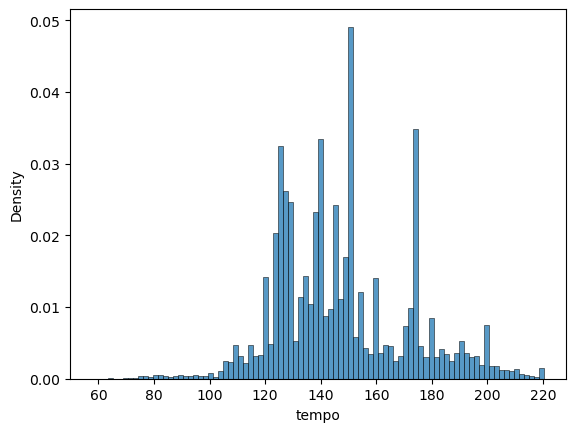

In [43]:
# graph distribution of song tempos
sns.histplot(song_tempos, stat = 'density')
plt.title("Population Distribution")
plt.show()
plt.clf()

In [46]:
# sampling distribution
sample_size = 30
sample_means = []
for i in range(500) :
    sample = np.random.choice(song_tempos, sample_size, replace = False)
    current_sample_mean = np.mean(sample)
    sample_means.append(current_sample_mean)
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

147.3485074666667

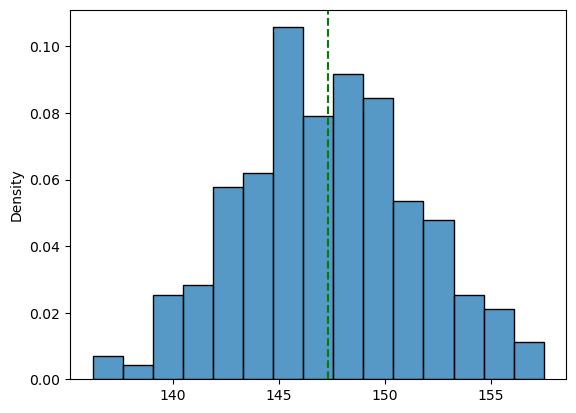

<Figure size 640x480 with 0 Axes>

In [48]:
# plot the sampling distribution
sns.histplot(sample_means, stat='density')
plt.axvline(mean_of_sample_means, color = 'g', linestyle = 'dashed')
plt.show()
plt.clf()

In [49]:
# compare the sampling distribution of the sample minimum to population minimum
sdmin = min(sample_means)
popmin = min(song_tempos)
print(sdmin, popmin)

136.22986666666665 57.967
